In [176]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [178]:
!pip3 install --upgrade pandas

In [179]:
# Loading the dataset from sklearn datasets package

data_url = "ML-Algos/Boston.csv"

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(data_url, index_col=0)
print(data.head(5))


data.head()

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2  


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [186]:
data.shape 
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [188]:
print(f'Any NaN values? {data.isna().values.any()}')


Any NaN values? False


In [190]:
print(f'Any duplicates? {data.duplicated().values.any()}')


Any duplicates? False


In [192]:
data.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [194]:
# Consider only one feature

data['Price'] = data['medv']
x = data
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Price
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,22.0


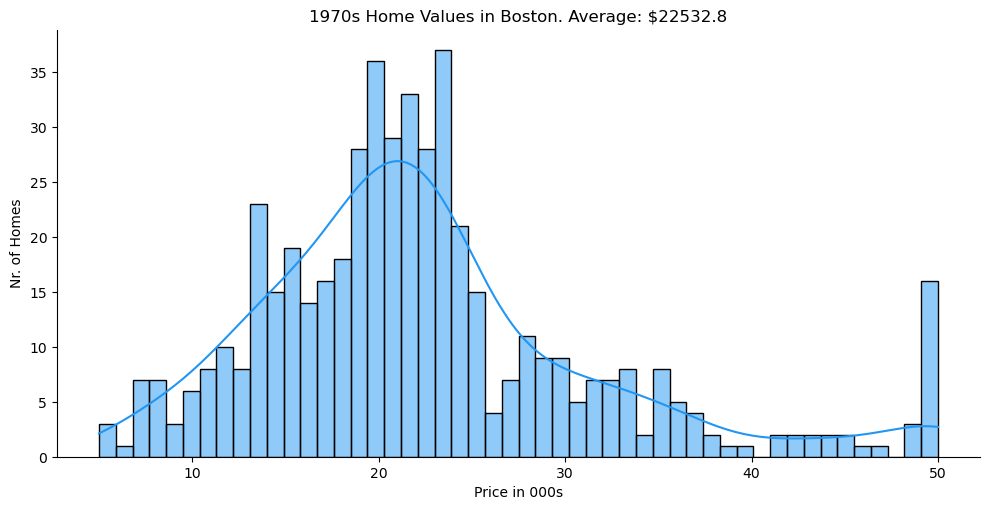

In [200]:
sns.displot(data['Price'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')
plt.title(f'1970s Home Values in Boston. Average: ${(1000*data.Price.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Homes')

plt.show()


In [226]:
target = data['Price']
features = data.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)


In [228]:
print("xtrain shape : ", X_train.shape)
print("xtest shape  : ", X_test.shape)
print("ytrain shape : ", y_train.shape)
print("ytest shape  : ", y_test.shape)

xtrain shape :  (404, 14)
xtest shape  :  (102, 14)
ytrain shape :  (404,)
ytest shape  :  (102,)


In [230]:
test_pct = 100*X_test.shape[0]/features.shape[0]

print(X_test.shape[0])
print(features.shape[0])
print(len(features))

102
506
506


In [232]:
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')


Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%.


In [236]:
#Run the regression
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)
print(rsquared)

print(f'Training data r-squared: {rsquared:.2}')

1.0
Training data r-squared: 1.0


In [238]:
#Evaluate the Coefficients of the Model

regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef


,Coefficient
crim,2.320566e-16
zn,-1.716190e-16
indus,-4.953523e-16
chas,-3.169349e-15
nox,1.809424e-14
rm,-2.189385e-15
age,2.787063e-17
dis,5.250449e-16
rad,2.100097e-16
tax,-2.011738e-16


In [246]:
#Premium for having an extra room

premium = regr_coef.loc['rm'].values[0] * 1000  # i.e., ~3.11 * 1000
print(f'The price premium for having an extra room is ${premium:.5}')

The price premium for having an extra room is $-2.1894e-12


In [250]:
#Analyse the Estimated Values & Regression Residuals

predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

C:\Users\swapn\AppData\Local\Temp\ipykernel_27516\2207566694.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  res = sn.distplot(data)


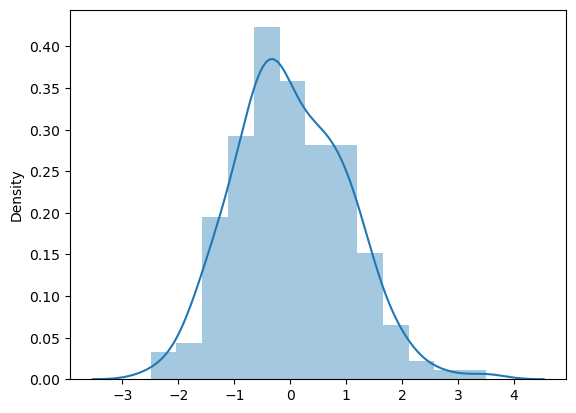

array([-3.56987009e-01, -3.16708205e-01, -8.57837737e-01, -1.13662620e+00,
       -6.72736672e-01,  1.59036646e+00,  1.13121108e+00,  2.36581943e-01,
       -1.02610151e+00,  4.45697985e-01,  9.46416845e-01,  1.34175903e+00,
       -2.74767229e-01, -6.45526311e-01, -9.03561287e-01, -1.06763682e+00,
        4.56283650e-01,  9.11204472e-01,  6.35733328e-01,  5.01239119e-01,
       -1.07831357e+00,  1.90297556e-02, -6.04927839e-01,  3.49666676e+00,
        3.82820616e-01,  3.18083868e-01, -7.46374420e-03,  1.42613594e+00,
        2.34265649e+00,  5.45047902e-01, -1.49037248e+00, -7.08956904e-01,
       -5.23988646e-01,  4.67458089e-01,  4.40525185e-01,  3.60623737e-01,
        1.28952301e+00,  1.76173445e-01, -1.58647484e-01,  5.26937578e-01,
        2.55160869e-01, -1.18708445e+00, -8.81602557e-01,  1.17776220e+00,
        3.58645419e-01, -6.89845957e-01,  1.70610949e-01,  1.06147938e+00,
        7.50860594e-01,  1.21461751e+00,  4.64151111e-01, -9.06401055e-01,
        2.13632293e+00,  

In [152]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

data = np.random.randn(200)
res = sn.distplot(data)
plt.show()
data